In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import hamiltonian_qutip as hamiltonian
import parameters_qutip as parameters



In [2]:
# Helper function for unit conversion
def tesla_to_GHz(B_tesla):
    mu_B = 13.99624555e9  # Bohr magneton in GHz/T
    g_e = 2.00208
    return mu_B * g_e * B_tesla

# Parameters
f_units = 1e9
S_nuclear = 1/2
intensity = 1.0
linewidth = 0.080  # Already in GHz (was 80*1e6/f_units)

# Hyperfine and strain parameters
rmep = parameters.rmep  # ratio of electron to proton mass
rg = rmep  # Note: original code passes rmep here, though rg = -2.00208*rmep/2 would be more correct

Add = -0.232
alpha = 928  # Strain parameter in GHz



C:\Users\56430\AppData\Local\Temp/ipykernel_7328/199546723.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot_axis[0].pcolormesh(f, thetas, ple_spectra_theta)
C:\Users\56430\AppData\Local\Temp/ipykernel_7328/199546723.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot_axis[1].pcolormesh(f, phis, ple_spectra_phi)


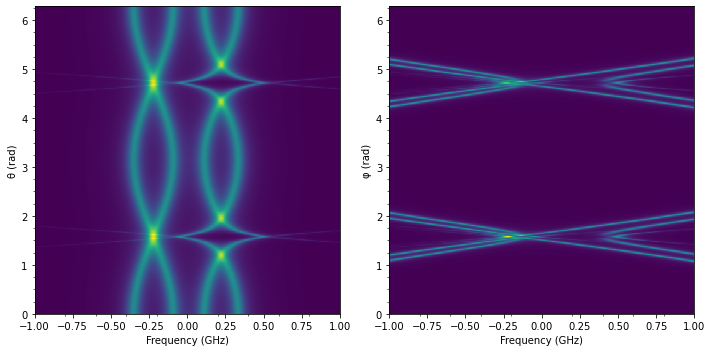

In [23]:
# PLE Spectrum calculations
B_abs = np.array([tesla_to_GHz(0.2)/f_units])

# Along theta
phi_b = np.pi/2 * 1.0
f = np.linspace(-1.0, 1.0, 3001)
thetas = np.linspace(0, 2*np.pi, 501)

ple_spectra_theta = []
for theta in thetas:
    simulated_290mT = hamiltonian.PLE_spectrum(
        Sn=S_nuclear, intensity=intensity, lw=linewidth, f_meas=f, B=B_abs, 
        theta=theta, phi=phi_b, rg=rmep, 
        q=parameters.q, Aperp=parameters.Aperp_gnd, Apar=parameters.Apar_gnd, 
        L=parameters.L, alpha=alpha, beta=0, 
        q_exc=0.025, Aperp_exc=-Add, Apar_exc=Add, 
        L_exc=parameters.L_exc, alpha_exc=500, beta_exc=0, eta=np.array([1,0,1])
    )
    ple_spectra_theta.append(simulated_290mT.squeeze())


# Along phi
theta_b = 0.5 * np.pi
phis = np.linspace(0, 2*np.pi, 501)

ple_spectra_phi = []
for phi in phis:
    simulated_290mT = hamiltonian.PLE_spectrum(
        Sn=S_nuclear, intensity=intensity, lw=linewidth, f_meas=f, B=B_abs, 
        theta=theta_b, phi=phi, rg=rmep, 
        q=parameters.q, Aperp=parameters.Aperp_gnd, Apar=parameters.Apar_gnd, 
        L=parameters.L, alpha=alpha, beta=0, 
        q_exc=0.025, Aperp_exc=-Add, Apar_exc=Add, 
        L_exc=parameters.L_exc, alpha_exc=500, beta_exc=0, eta=np.array([1,0,1])
    )
    ple_spectra_phi.append(simulated_290mT.squeeze())

# Plot results
fig, plot_axis = plt.subplots(1, 2, figsize=(5*2, 5))
plot_axis[0].pcolormesh(f, thetas, ple_spectra_theta)
plot_axis[1].pcolormesh(f, phis, ple_spectra_phi)

for i in range(2):
    plot_axis[i].set_xlabel('Frequency (GHz)')
    plot_axis[i].set_xticks([-1.0 + 0.2*i for i in range(11)], minor=True)
    plot_axis[i].set_yticks([0 + 0.25*i for i in range(26)], minor=True)
plot_axis[0].set_ylabel('θ (rad)')
plot_axis[1].set_ylabel('φ (rad)')

plt.tight_layout()
plt.show()



C:\Users\56430\AppData\Local\Temp/ipykernel_7328/4268274900.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot_axis[0].pcolormesh(f, thetas, ple_spectra_theta_offset)
C:\Users\56430\AppData\Local\Temp/ipykernel_7328/4268274900.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot_axis[1].pcolormesh(f, phis, ple_spectra_phi_offset)


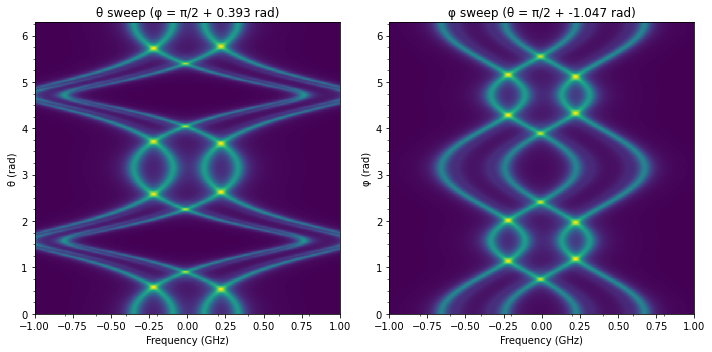

In [41]:
# PLE Spectrum with small offsets to break symmetry
B_abs = np.array([tesla_to_GHz(0.2)/f_units])

# Small offsets to create different traces
phi_offset =  np.pi / 8  # Small offset from pi/2 for theta sweep
theta_offset = -np.pi / 3  # Small offset from pi/2 for phi sweep

# Along theta (with small phi offset from pi/2)
phi_b = np.pi/2 + phi_offset  # pi/2 + small offset
f = np.linspace(-1.0, 1.0, 3001)
thetas = np.linspace(0, 2*np.pi, 501)

ple_spectra_theta_offset = []
for theta in thetas:
    simulated_290mT = hamiltonian.PLE_spectrum(
        Sn=S_nuclear, intensity=intensity, lw=linewidth, f_meas=f, B=B_abs, 
        theta=theta, phi=phi_b, rg=rmep,  # theta varies, phi fixed at offset
        q=parameters.q, Aperp=parameters.Aperp_gnd, Apar=parameters.Apar_gnd, 
        L=parameters.L, alpha=alpha, beta=0, 
        q_exc=0.025, Aperp_exc=-Add, Apar_exc=Add, 
        L_exc=parameters.L_exc, alpha_exc=500, beta_exc=0, eta=np.array([1,0,1])
    )
    ple_spectra_theta_offset.append(simulated_290mT.squeeze())


# Along phi (with small theta offset from pi/2)
theta_b = np.pi/2 + theta_offset  # pi/2 + small offset
phis = np.linspace(0, 2*np.pi, 501)

ple_spectra_phi_offset = []
for phi in phis:
    simulated_290mT = hamiltonian.PLE_spectrum(
        Sn=S_nuclear, intensity=intensity, lw=linewidth, f_meas=f, B=B_abs, 
        theta=theta_b, phi=phi, rg=rmep,  # phi varies, theta fixed at offset
        q=parameters.q, Aperp=parameters.Aperp_gnd, Apar=parameters.Apar_gnd, 
        L=parameters.L, alpha=alpha, beta=0, 
        q_exc=0.025, Aperp_exc=-Add, Apar_exc=Add, 
        L_exc=parameters.L_exc, alpha_exc=500, beta_exc=0, eta=np.array([1,0,1])
    )
    ple_spectra_phi_offset.append(simulated_290mT.squeeze())

# Plot results
fig, plot_axis = plt.subplots(1, 2, figsize=(5*2, 5))
plot_axis[0].pcolormesh(f, thetas, ple_spectra_theta_offset)
plot_axis[1].pcolormesh(f, phis, ple_spectra_phi_offset)

for i in range(2):
    plot_axis[i].set_xlabel('Frequency (GHz)')
    plot_axis[i].set_xticks([-1.0 + 0.2*i for i in range(11)], minor=True)
    plot_axis[i].set_yticks([0 + 0.25*i for i in range(26)], minor=True)
plot_axis[0].set_ylabel('θ (rad)')
plot_axis[1].set_ylabel('φ (rad)')
plot_axis[0].set_title(f'θ sweep (φ = π/2 + {phi_offset:.3f} rad)')
plot_axis[1].set_title(f'φ sweep (θ = π/2 + {theta_offset:.3f} rad)')

plt.tight_layout()
plt.show()

